## Data Pre Processing

### Below though X as 1 column only but we shouldnt make X as vector so to make it as matrix we have to use dataset.iloc[:, 1:2]

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset=pd.read_csv('Position_Salaries.csv')

X=dataset.iloc[:, 1:2].values
Y=dataset.iloc[:, 2].values

In [14]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [16]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

### As we have very less datasets so we dont need to divide it into training and test datasets and also no needto use standard scaler to scale the data because the we will be using linearRegression class which automatically uses the scaling mechanism

### Simple Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X, Y) 


LinearRegression()

### Fitting Polynomial Regression to the dataset

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)

In [37]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

### *** What is the difference between Fit_Transform and Fit Method?

<b>These methods are used for dataset transformations in scikit-learn:<br>

Let us take an example for Scaling values in a dataset:

Here the fit method, when applied to the training dataset,learns the model parameters (for example, mean and standard deviation). We then need to apply the transform method on the training dataset to get the transformed (scaled) training dataset. We could also perform both of this steps in one step by applying fit_transform on the training dataset.

Then why do we need 2 separate methods - fit and transform ?

In practice we need to have a separate training and testing dataset and that is where having a separate fit and transform method helps. We apply fit on the training dataset and use the transform method on both - the training dataset and the test dataset. Thus the training as well as the test dataset are then transformed(scaled) using the model parameters that were learnt on applying the fit method the training dataset.</b>

In [38]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly, Y) 

LinearRegression()

### Visualizing the Linear regression Results

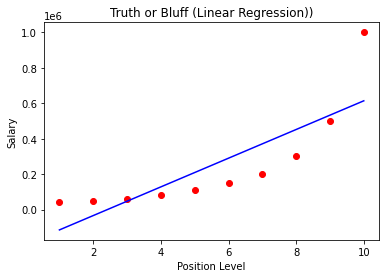

In [39]:
plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression))')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualizing the Polynomial Regression Results

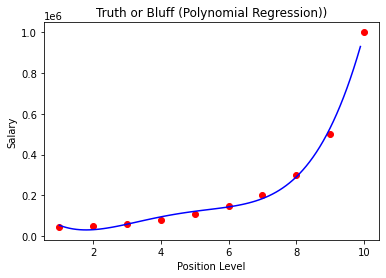

In [43]:
X_grid=np.arange(min(X), max(X), 0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X, Y, color='red')

# plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression))')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Predicting a new result with Linear Regression

In [54]:
lin_reg.predict([[6.5]])

array([330378.78787879])

### Predicting a new result with Polynomial regression

In [57]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [60]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])